# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)




A) ENCONTRAR LA ECUACION TRASCENDENTAL 

El area del cono que se considera es
\begin{equation}
A1= \frac{R^2\theta}{2} 
\end{equation}

El area del triangulo es

\begin{equation}
A2= (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}

Entoces el area de la region circular es

\begin{equation}A=\frac{R^2\theta}{2} - (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}

Como el area del segmento circular debe ser igual a la cuarta parte del area de un circulo.

\begin{equation}\frac{\pi R^2}{4}=\frac{R^2\theta}{2} - (sin\frac{\theta}{2})(cos\frac{\theta}{2}) R^2
\end{equation}


\begin{equation}\frac{\pi}{2}= \theta- 2(sin\frac{\theta}{2})(cos\frac{\theta}{2})
\end{equation}

De la identidad trigonometrica:

\begin{equation} sin\theta=2(sin\frac{\theta}{2})(cos\frac{\theta}{2})\end{equation}







Finalmente la ecuacion que modela el problema es:

\begin{equation}\frac{\pi}{2} =\theta-sin\theta
\end{equation}









B. Encontar el valor del \begin{equation} \theta
\end{equation} que satisface la ecuaci'on es eqquivalente a encontrar las raices de la funcion:

\begin{equation}f(\theta)=\theta-sin\theta-\frac{\pi}{2} 
\end{equation}


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

In [3]:


f = lambda theta: theta-np.sin(theta)-np.pi/2

theta=np.linspace(-2*(np.pi),2*(np.pi),1000) 

In [4]:
# Construimos un DataFrame con valores de Theta

df = pd.DataFrame() 
df["theta"] = theta
df["F_theta"] = f(theta)
df

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


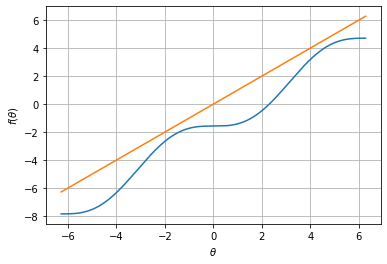

In [5]:
plt.figure()
plt.plot(df["theta"], df["F_theta"] )
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.plot(theta,theta)
plt.grid()
plt.show()

In [36]:
root = optimize.bisect(f, 0, 4)
print("EL ángulo es: :",root)

EL ángulo es: : 2.309881460010729


In [7]:
#Secante
optimize.newton(f,2, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

2.309881460010033

In [8]:
#newton 
df= lambda theta: 1-np.cos(theta)
optimize.newton(f,2, df, args=(), tol=1.48e-08, maxiter=1000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

2.3098814600100575

Para emplear el metodo de punto fijo creamos una funcion

\begin{equation}g(\theta)=\theta+f(\theta)
\end{equation}


Sea $$\theta1$$ una raiz de f, entoces tenemos que 

\begin{equation}g(\theta1)=\theta1+f(\theta1)
\end{equation}

\begin{equation}g(\theta1)=\theta1
\end{equation}







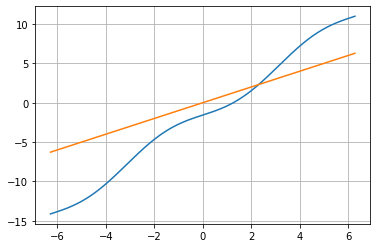

In [9]:
# Punto Fijo
g=lambda theta: 2*theta-np.sin(theta)-np.pi/2 

plt.plot(theta,g(theta))
plt.plot(theta,theta)
plt.grid()


In [10]:
#De la grafica podemos observar que 2 es un punto aproximado a la raiz buscada

optimize.fixed_point(g,2, args=(), xtol=1e-08, maxiter=100, method='del2')

array(2.30988146)




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


```



1. Defina dos funciones, una para x y otra para y. 

`
2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [12]:
#

v0 = 60                    #Velocidad en m/s
alpha = np.pi              #Angulo del viento
theta = np.deg2rad(45)    
u =0                        #rapidez del viento
b = 0.05                   #Parametro de friccion 
g = 9.8                    #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla. #Angulo de lanzamiento


In [13]:
#1 FUNCIONES PARA LA POSICION EN x Y EN y

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u, g):
  T1 = u * t * np.cos(alpha)                              #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) )        #Termino 2
  T3 = (1 - np.e**(-b*t))                                   #Termino 3

  return T1 + T2*T3 
    

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3

In [14]:
#2 CONTRUIR UN DICCIONARIO CON LAS CLAVES 'X', 'Y' y 'TIEMPO'

t = np.linspace(0, 20, 100)      # Tiempo 
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params) 
mov = { "X": x , "Y": y, "Tiempo": t }  # diccionario

#3
df = pd.DataFrame.from_dict(mov)

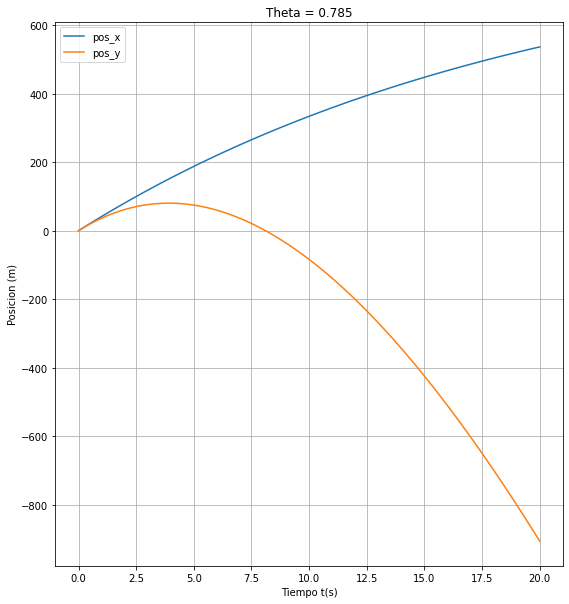

In [38]:
#4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.xlabel("Tiempo t(s)")
plt.ylabel("Posicion (m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()

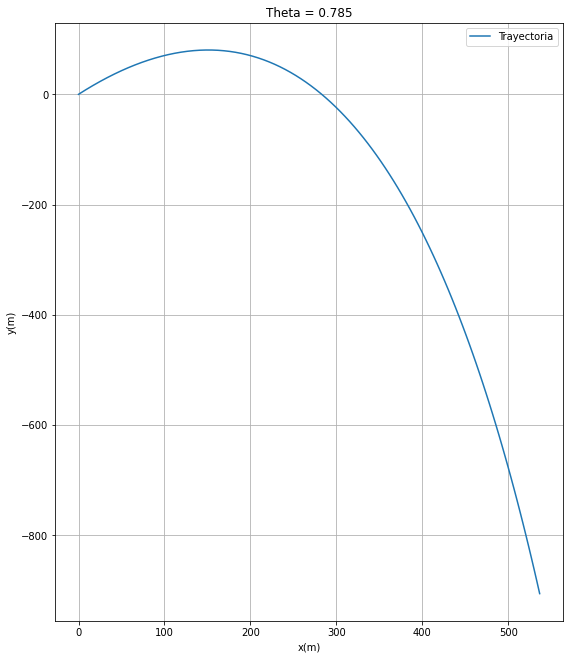

In [39]:
#grafico de la trayectoria 

plt.figure(figsize=(20,11))
plt.subplot(122)
plt.plot(df["X"], df["Y"], label="Trayectoria") 
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.


Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}


En la funcion pos_y la unica variable independiente es el tiempo. Para hallar el tiempo para el que la particula llega al piso, buscamos las raices de pos_y

In [20]:
tf = optimize.newton(pos_y, 10, args=(theta, alpha, v0, b, u,g))  #tiempo en que la particula vuelve al piso

Con las raices de la funcion tenemos el tiempo para el que la particula llega al suelo otra vez. Se evalua este valor en x y obtenemos el alcance maximo sobre el eje 

In [22]:
pos_x(tf, theta, alpha, v0, b, u, g)   #alcance maximo sobre el eje x

239.60614945520706

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.

---



Ahora pos_y es funcion del tiempo y de theta

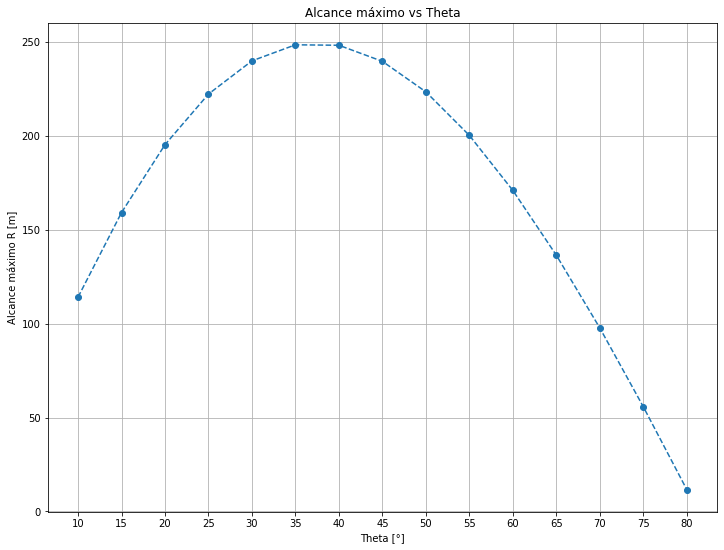

In [23]:
th1 = np.arange(10, 80+5, 5)
th = np.radians(th1)          #angulos en rad
am = np.zeros(len(th))        # Arreglo de alcances máximos

for i in range(th.size):
  # Tiempo en el que la partícula llega al suelo
  tam = optimize.newton(pos_y, 10, args=(th[i], alpha, v0, b, u,g))

 #Para Theta_i se obtiene una funcion de pos_y diferente, por tanto un tiempo final diferente
 #Aun asi usamos 10 como semilla para hallar la raiz, como se vio anteriormente de la grafica de pos_y es parabolica 
 #Entonces se garantiza la convergencia del metodo de Newton  para cualquier semilla que se tome
 
  
  am[i] = pos_x(tam, th[i], alpha, v0, b, u, g)     # Alcance máximo para theta[i]

plt.figure(figsize=(12,9))
plt.plot(th1, am, 'o--')
plt.title('Alcance máximo vs Theta')
plt.xlabel('Theta [°]')
plt.ylabel('Alcance máximo R [m]')
plt.xticks(th1)
plt.grid()

7. Realice una interpolacion de R como función de theta.

In [25]:
from scipy.interpolate import lagrange


AM = lagrange(th1,am)  

In [26]:
AM

poly1d([ 5.21944577e-28, -4.06741855e-25,  1.45646938e-22, -3.07760094e-20,
        3.85279342e-18, -1.64056943e-16, -4.08228674e-14,  9.85550655e-12,
       -9.44003576e-10, -2.36236738e-08,  2.17833578e-05, -1.79060077e-03,
       -1.25602464e-01,  1.28228277e+01, -1.13479959e-06])

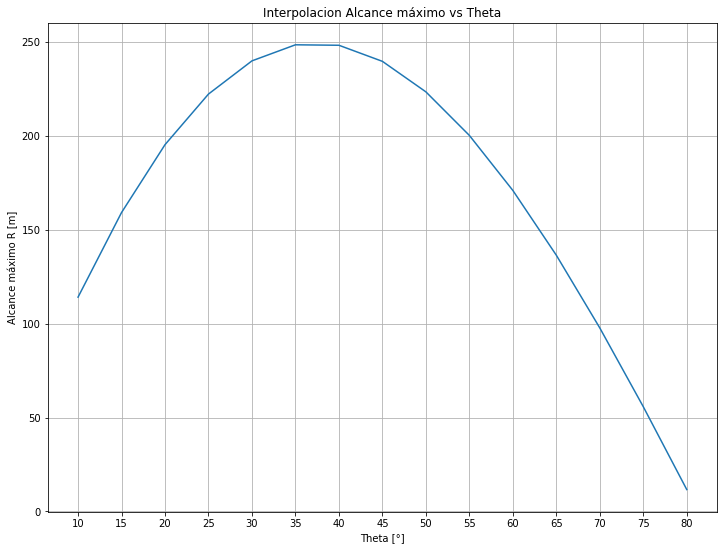

In [29]:


plt.figure(figsize=(12,9))
plt.plot(th1,AM(th1))
plt.title('Interpolacion Alcance máximo vs Theta')
plt.xlabel('Theta [°]')
plt.ylabel('Alcance máximo R [m]')
plt.xticks(th1)
plt.grid()

Yennifer Yuliana Guerrero Uchima y
Valentina Rodriguez Hernandez